## Manually creating Observations

In [1]:
from astropy.visualization import make_lupton_rgb
from astropy.io import fits
from astropy.nddata import Cutout2D, block_reduce
import astropy.units as un
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS
from astropy.stats import sigma_clip

from reproject.mosaicking import find_optimal_celestial_wcs, reproject_and_coadd
from reproject import reproject_interp

from PIL import Image,ImageOps
import os
import numpy as np
import glob
import matplotlib.pyplot as plt

In [2]:
folder = 'C:/Users/oryan/Documents/Observational_Dataset/data/missing-obs/Arp148/'

In [3]:
colours = {
    'u': [folder + 'frame-u-003893-3-0080.fits'],
    'g': [folder + 'frame-g-003893-3-0080.fits'],
    'r': [folder + 'frame-r-003893-3-0080.fits'],
    'i': [folder + 'frame-i-003893-3-0080.fits'],
    'z': [folder + 'frame-z-003893-3-0080.fits']
}

In [4]:
u = fits.open(colours['u'][0])[0].data
g = fits.open(colours['g'][0])[0].data
r = fits.open(colours['r'][0])[0].data
i = fits.open(colours['i'][0])[0].data
z = fits.open(colours['z'][0])[0].data

u_hdul = fits.open(colours['u'][0])[0].header
g_hdul = fits.open(colours['g'][0])[0].header
r_hdul = fits.open(colours['r'][0])[0].header
i_hdul = fits.open(colours['i'][0])[0].header
z_hdul = fits.open(colours['z'][0])[0].header

In [320]:
u_hdul

SIMPLE  =                    T /                                                
BITPIX  =                  -32 / 32 bit floating point                          
NAXIS   =                    2                                                  
NAXIS1  =                 2048                                                  
NAXIS2  =                 1489                                                  
EXTEND  =                    T /Extensions may be present                       
BZERO   =              0.00000 /Set by MRD_SCALE                                
BSCALE  =              1.00000 /Set by MRD_SCALE                                
TAI     =        4557957790.64 / 1st row - Number of seconds since Nov 17 1858  
RA      =            166.05897 / 1st row - Right ascension of telescope boresigh
DEC     =            40.915962 / 1st row - Declination of telescope boresight (d
SPA     =              77.332  / 1st row - Camera col position angle wrt north (
IPA     =             215.04

In [321]:
#galaxy_hdus_u = [fits.open(file)[0] for file in colours['u']]
#galaxy_hdus_g = [fits.open(file)[0] for file in colours['g']]
#galaxy_hdus_r = [fits.open(file)[0] for file in colours['r']]
#galaxy_hdus_i = [fits.open(file)[0] for file in colours['i']]
#galaxy_hdus_z = [fits.open(file)[0] for file in colours['z']]

In [322]:
#wcs_out_u,shape_out_u = find_optimal_celestial_wcs(galaxy_hdus_u)
#wcs_out_g,shape_out_g = find_optimal_celestial_wcs(galaxy_hdus_g)
#wcs_out_r,shape_out_r = find_optimal_celestial_wcs(galaxy_hdus_r)
#wcs_out_i,shape_out_i = find_optimal_celestial_wcs(galaxy_hdus_i)
#wcs_out_z,shape_out_z = find_optimal_celestial_wcs(galaxy_hdus_z)

In [323]:
wcs_u = WCS(header=u_hdul)
wcs_g = WCS(header=g_hdul)
wcs_r = WCS(header=r_hdul)
wcs_i = WCS(header=i_hdul)
wcs_z = WCS(header=z_hdul)

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


In [324]:
#array_u,_ = reproject_and_coadd(galaxy_hdus_u,wcs_out_u,shape_out=shape_out_u,reproject_function=reproject_interp)
#array_g,_ = reproject_and_coadd(galaxy_hdus_g,wcs_out_g,shape_out=shape_out_g,reproject_function=reproject_interp)
#array_r,_ = reproject_and_coadd(galaxy_hdus_r,wcs_out_r,shape_out=shape_out_r,reproject_function=reproject_interp)
#array_i,_ = reproject_and_coadd(galaxy_hdus_i,wcs_out_i,shape_out=shape_out_i,reproject_function=reproject_interp)
#array_z,_ = reproject_and_coadd(galaxy_hdus_z,wcs_out_z,shape_out=shape_out_z,reproject_function=reproject_interp)

In [325]:
rgb = [u,g,r,i,z]

In [326]:
wcs = [wcs_u,wcs_g,wcs_r,wcs_i,wcs_z]

In [327]:
cutout_size = 150

In [328]:
position = SkyCoord(ra = 165.97011 * un.deg, dec = 40.84925 * un.deg ,frame='icrs')
cutout = np.zeros([cutout_size,cutout_size,5],'float32')

In [329]:
rgb[0].shape

(1489, 2048)

In [330]:
for i in range(5):
    tmp = Cutout2D(rgb[i],position,(cutout_size,cutout_size),wcs=wcs[i],mode='partial')
    cutout[:,:,i] = tmp.data

In [331]:
cutout_flux = np.zeros(cutout.shape)

In [332]:
for i in range(5):
    cutout_flux[:,:,i] = cutout[:,:,i] * 1e-23 * 3.631e-6

In [333]:
im = np.sum(cutout_flux,2)

C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


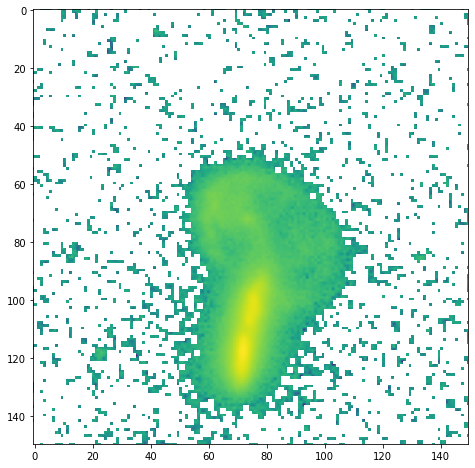

In [334]:
plt.figure(figsize=(12,8))
plt.imshow(np.log10(im))

In [335]:
white_image_red = block_reduce(im,im.shape[0]/50)

In [336]:
white_image_red

array([[-4.07563509e-30,  7.88130976e-31, -6.76414961e-30, ...,
         8.07488343e-30, -1.53220213e-29,  2.45690590e-29],
       [-1.95843726e-29,  1.09497621e-29,  2.99808124e-31, ...,
         2.54199885e-30, -7.16801244e-30,  1.71920664e-29],
       [-6.40699455e-30,  4.75378922e-30,  1.69270245e-29, ...,
        -1.70626972e-29, -8.10940780e-30, -1.75959323e-29],
       ...,
       [ 2.61561990e-30, -6.07661000e-30,  2.86338930e-29, ...,
        -1.04408695e-29, -1.50430586e-29,  5.63624834e-30],
       [-4.43213015e-30,  9.09585415e-30,  3.31019678e-29, ...,
         1.71810908e-29,  2.03446267e-29,  3.73773715e-29],
       [ 2.52546927e-29, -1.18380031e-29, -3.61459959e-30, ...,
         2.58625859e-29,  9.48116627e-32, -1.29811745e-29]])

C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


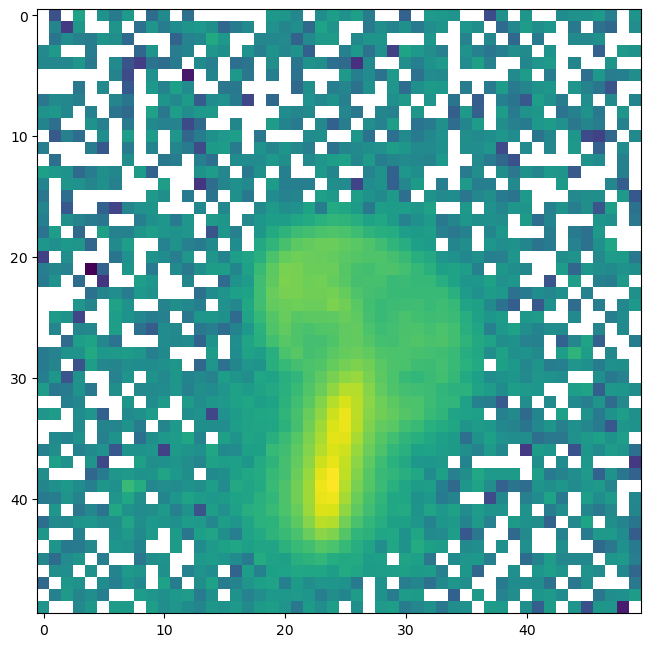

In [337]:
plt.figure(figsize=(12,8),dpi=100)
plt.imshow(np.log10(white_image_red))

In [338]:
def star_remover(im):
    clipped_image = sigma_clip(im,sigma=10,maxiters=1,cenfunc = 'median')
    
    mask = clipped_image.mask
    stellar_pixels = np.where(mask)
    
    for i in range(len(stellar_pixels[0])):
        x = stellar_pixels[0][i]
        y = stellar_pixels[1][i]
    
        if x - 3 < 0:
            x = x + 3
        if x + 3 > im.shape[0]:
            x = im.shape[0] - 3
        if y - 3 < 0:
            y = y + 3
        if y + 3 > im.shape[1]:
            y = im.shape[1] - 3

        replacement = np.median(im[x-3:x+3,y-3:y+3])*np.random.random([6,6])
    
        im[x-3:x+3,y-3:y+3] = replacement
    return im

In [339]:
star_flag = 0
if star_flag == 1:
    white_im_rem = star_remover(white_image_red)
    np.save(f'{folder}Arp148.npy',white_im_rem)
else:
    np.save(f'{folder}Arp148.npy',white_image_red)

In [340]:
im_2 = np.load(f'{folder}Arp148.npy')

C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


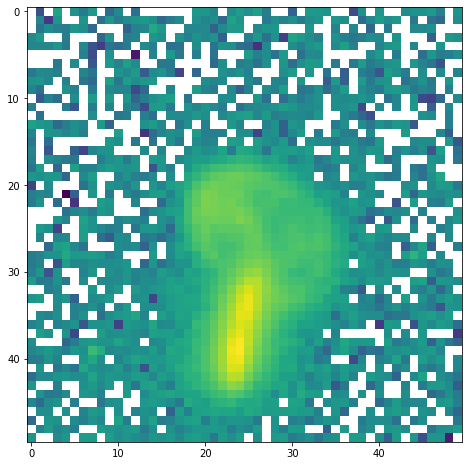

In [341]:
plt.figure(figsize=(12,8))
plt.imshow(np.log10(im_2))

In [342]:
im_2

array([[-4.07563509e-30,  7.88130976e-31, -6.76414961e-30, ...,
         8.07488343e-30, -1.53220213e-29,  2.45690590e-29],
       [-1.95843726e-29,  1.09497621e-29,  2.99808124e-31, ...,
         2.54199885e-30, -7.16801244e-30,  1.71920664e-29],
       [-6.40699455e-30,  4.75378922e-30,  1.69270245e-29, ...,
        -1.70626972e-29, -8.10940780e-30, -1.75959323e-29],
       ...,
       [ 2.61561990e-30, -6.07661000e-30,  2.86338930e-29, ...,
        -1.04408695e-29, -1.50430586e-29,  5.63624834e-30],
       [-4.43213015e-30,  9.09585415e-30,  3.31019678e-29, ...,
         1.71810908e-29,  2.03446267e-29,  3.73773715e-29],
       [ 2.52546927e-29, -1.18380031e-29, -3.61459959e-30, ...,
         2.58625859e-29,  9.48116627e-32, -1.29811745e-29]])

In [29]:
from astropy.io import fits
import glob
import os
import matplotlib.pyplot as plt
import numpy as np

from astropy.visualization import PercentileInterval, LinearStretch, ImageNormalize, SqrtStretch
from astropy.nddata import Cutout2D
from astropy import wcs
import astropy.units as u
from astropy.coordinates import SkyCoord

from reproject.mosaicking import find_optimal_celestial_wcs, reproject_and_coadd
from reproject import reproject_interp

In [2]:
folder = 'C:\\Users\\oryan\\Documents\\zoobot_new\\preprocessed-cutouts\\mastDownload\\HST\\'

In [3]:
filename_1 = os.path.join(folder, 'hst_10092_0g_acs_wfc_f814w_j8xi0g\\hst_10092_0g_acs_wfc_f814w_j8xi0g_drc.fits')

In [4]:
hdu_1 = fits.open(filename_1)[1]
image_header_1 = fits.open(filename_1)[1].header
image_1_data = fits.open(filename_1)[1].data

C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


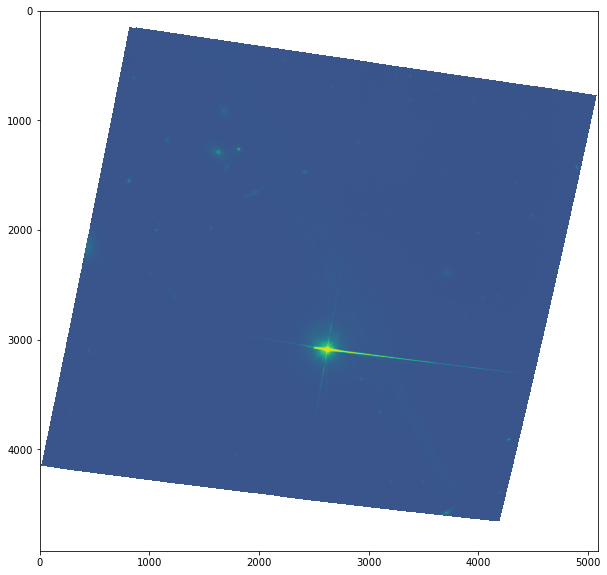

In [5]:
plt.figure(figsize=(10,10))
plt.imshow(np.log10(image_1_data))

In [8]:
coords = SkyCoord(ra=150.562364 * u.deg, dec=1.8324716 * u.deg, frame='fk5')

In [21]:
cutout = Cutout2D(image_1_data, coords, (150,150), wcs=wcs.WCS(image_header_1), mode='partial')

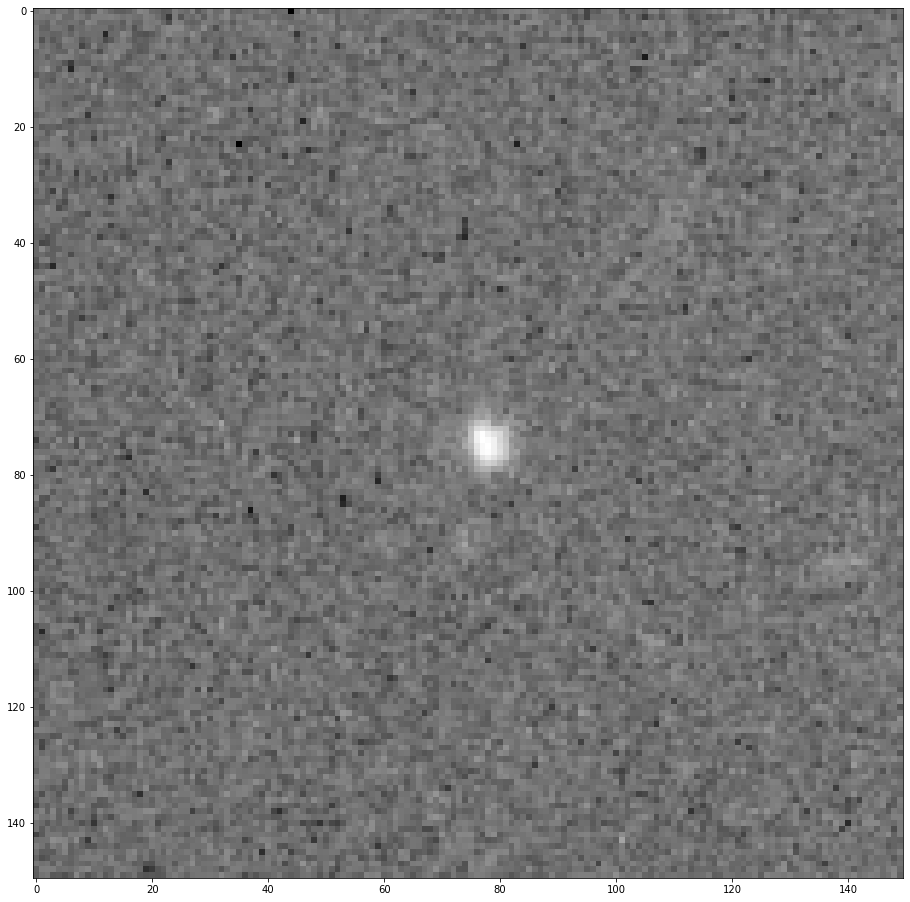

In [32]:
norm = ImageNormalize(np.log10(cutout.data), interval=ZScaleInterval(nsamples=5000,contrast=0.05),stretch=SqrtStretch(),clip=True)
plt.figure(figsize=(16,16))
plt.imshow(np.log10(cutout.data),cmap='Greys_r',norm=norm)

In [127]:
filename_2 = os.path.join(folder, 'hst_10092_0h_acs_wfc_f814w_j8xi0h\hst_10092_0h_acs_wfc_f814w_j8xi0h_drc.fits')

In [138]:
hdu_2 = fits.open(filename_2)[1]
image_header_2 = fits.open(filename_2)[1].header
image_2_data = fits.open(filename_2)[1].data

C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


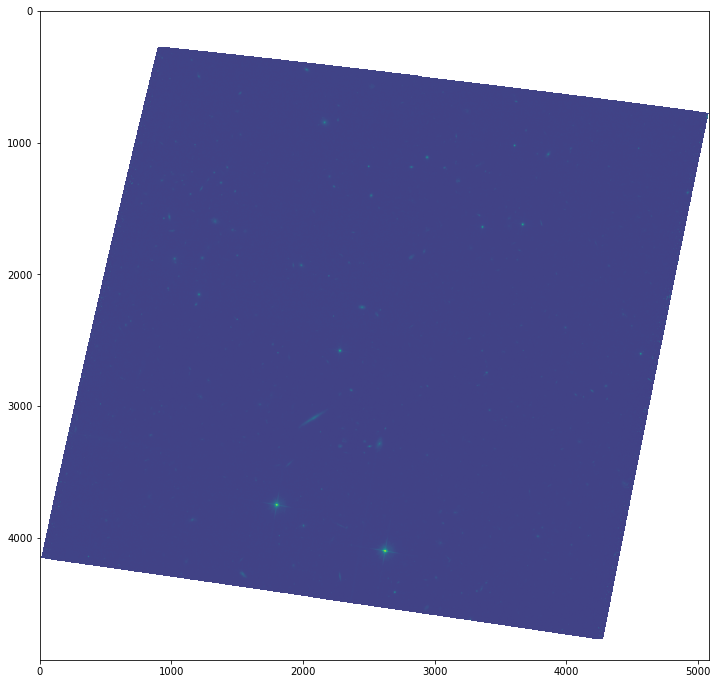

In [129]:
plt.figure(figsize=(12,12))
plt.imshow(np.log10(image_2_data))

In [130]:
hdus = [hdu_1, hdu_2]

In [131]:
wcs_out, shape_out = find_optimal_celestial_wcs(hdus)

In [132]:
array, footprint = reproject_and_coadd(hdus, output_projection=wcs_out, shape_out = shape_out, reproject_function=reproject_interp)

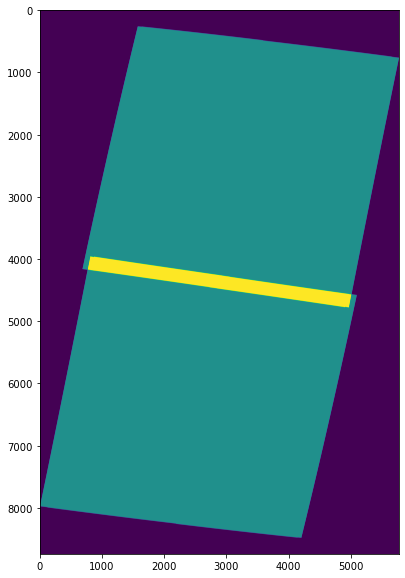

In [133]:
plt.figure(figsize=(10,10))
plt.imshow(footprint)

In [134]:
filename_3 = os.path.join(folder, 'hst_10092_4g_acs_wfc_f814w_j8xi4g\\hst_10092_4g_acs_wfc_f814w_j8xi4g_drc.fits')

In [140]:
hdu_3 = fits.open(filename_3)[1]
image_header_3 = fits.open(filename_3)[1].header
image_3_data = fits.open(filename_3)[1].data

C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


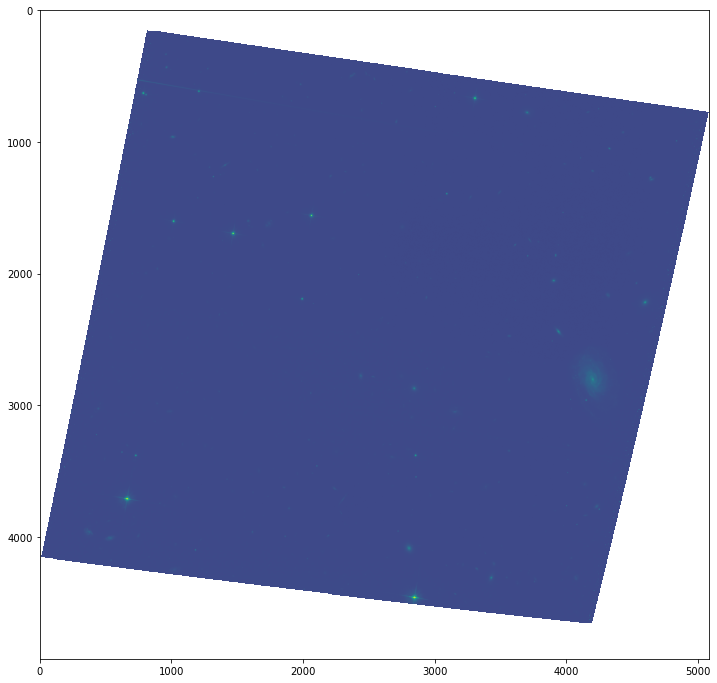

In [137]:
plt.figure(figsize=(12,12))
plt.imshow(np.log10(image_3_data))

In [141]:
hdus = [hdu_1,hdu_2,hdu_3]

In [142]:
wcs_out, shape_out = find_optimal_celestial_wcs(hdus)

In [144]:
array, footprint = reproject_and_coadd(hdus,wcs_out,shape_out=shape_out,reproject_function=reproject_interp)

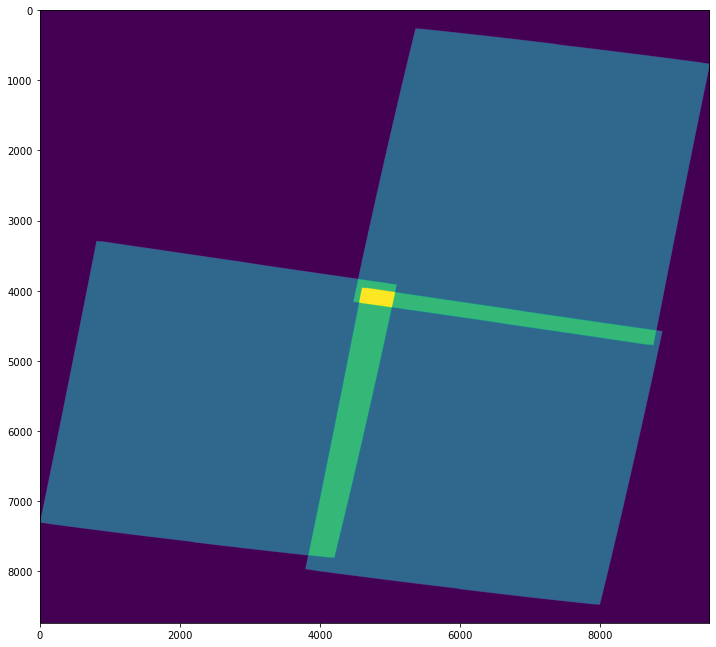

In [145]:
plt.figure(figsize=(12,12))
plt.imshow(footprint)

In [184]:
image_header_3

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 5088                                                  
NAXIS2  =                 4927                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
INHERIT =                    T / inherit the primary header                     
EXTNAME = 'SCI     '           / extension name                                 
EXTVER  =                    1                                                  
BUNIT   = 'ELECTRONS/S'        / Units of science product                       
                                                                                
              / WFC CCD CHIP

C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


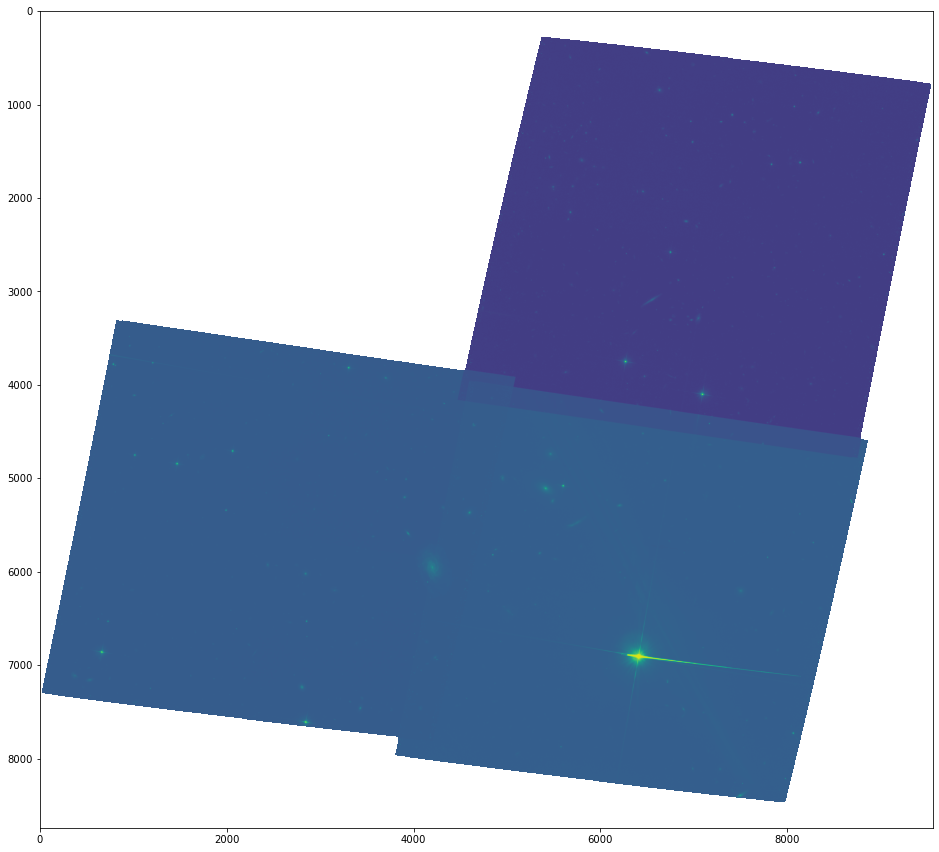

In [149]:
plt.figure(figsize=(16,16))
plt.imshow(np.log10(array))

In [193]:
coords = SkyCoord(ra=150.562364 * u.deg, dec=1.8324716 * u.deg, frame='fk5')

In [194]:
pix_coords = list(wcs.utils.skycoord_to_pixel(coords,wcs_out))

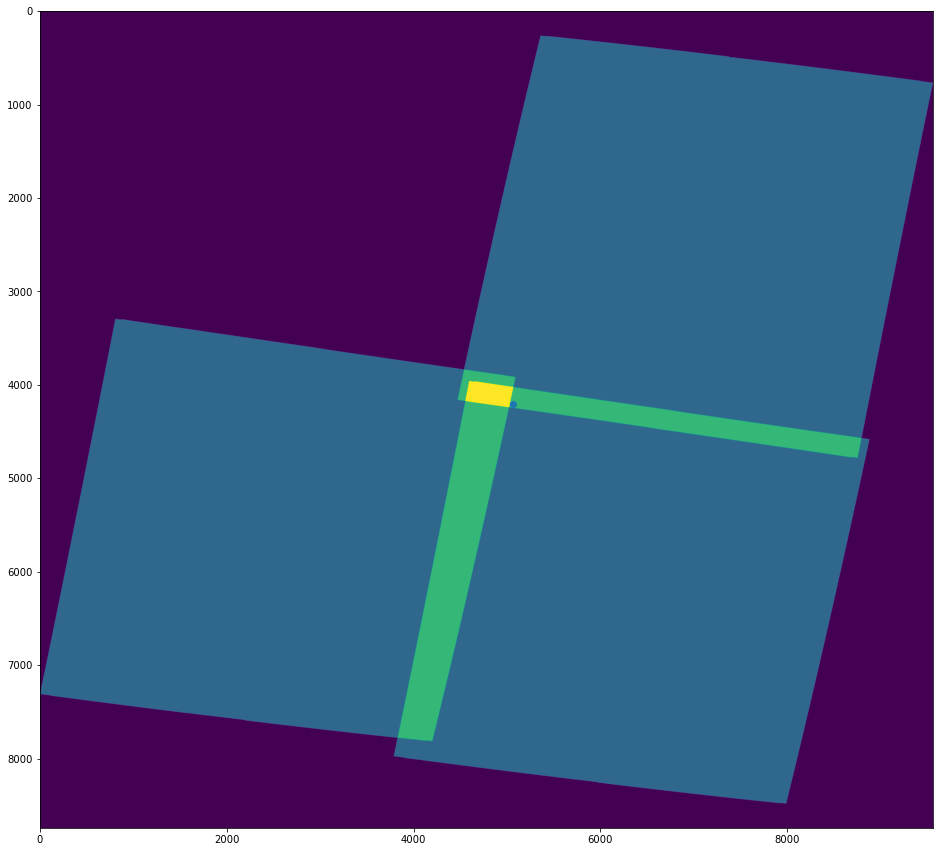

In [195]:
plt.figure(figsize=(16,16))
plt.scatter(pix_coords[0],pix_coords[1])
plt.imshow(footprint)

In [217]:
cutout = Cutout2D(array, coords, (150,150), wcs=wcs_out, mode='partial')

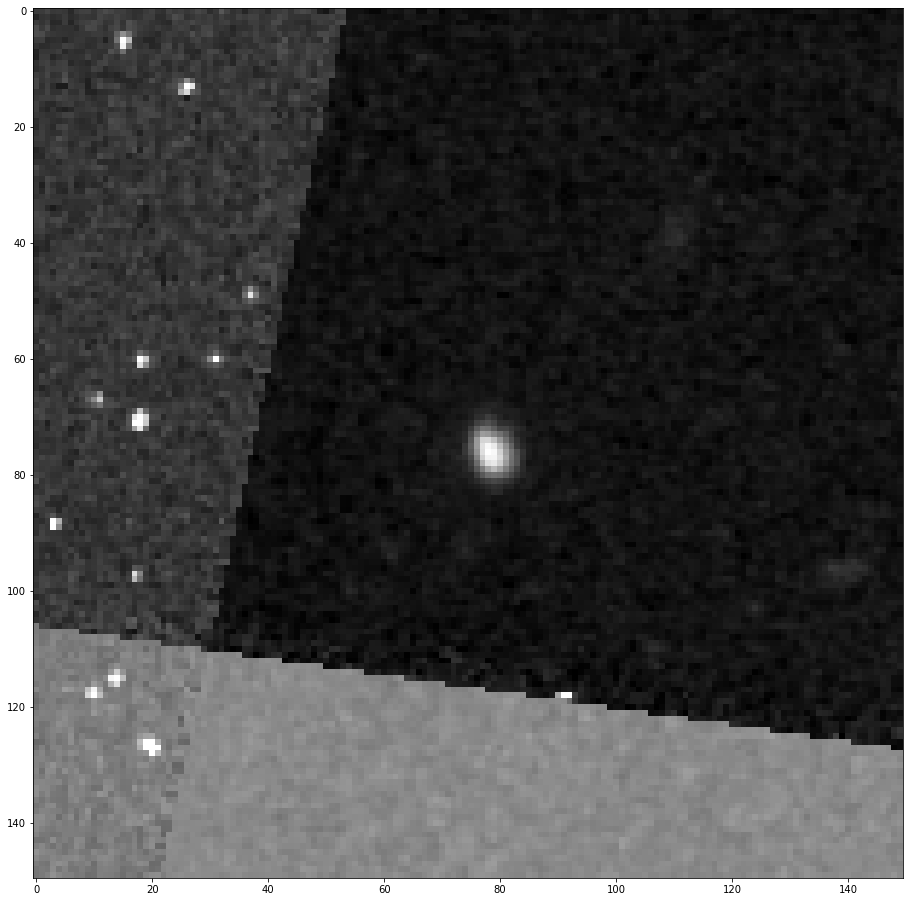

In [218]:
norm = ImageNormalize(np.log10(cutout.data), interval=ZScaleInterval(),stretch=LinearStretch())
plt.figure(figsize=(16,16))
plt.imshow(np.log10(cutout.data),cmap='Greys_r',norm=norm)

In [201]:
image_header_1

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 5090                                                  
NAXIS2  =                 4927                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
INHERIT =                    T / inherit the primary header                     
EXTNAME = 'SCI     '           / extension name                                 
EXTVER  =                    1                                                  
BUNIT   = 'ELECTRONS/S'        / Units of science product                       
                                                                                
              / WFC CCD CHIP

In [203]:
image_header_2

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 5086                                                  
NAXIS2  =                 4928                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
INHERIT =                    T / inherit the primary header                     
EXTNAME = 'SCI     '           / extension name                                 
EXTVER  =                    1                                                  
BUNIT   = 'ELECTRONS/S'        / Units of science product                       
                                                                                
              / WFC CCD CHIP

In [204]:
image_header_3

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 5088                                                  
NAXIS2  =                 4927                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
INHERIT =                    T / inherit the primary header                     
EXTNAME = 'SCI     '           / extension name                                 
EXTVER  =                    1                                                  
BUNIT   = 'ELECTRONS/S'        / Units of science product                       
                                                                                
              / WFC CCD CHIP

In [209]:
np.nanmin(image_1_data)

-1.0982666

In [210]:
np.nanmin(image_2_data)

-0.18243949

In [211]:
np.nanmin(image_3_data)

-0.083886914

In [219]:
import astrocut

In [232]:
test = astrocut.img_cut([filename_1, filename_2, filename_3], coords, (300,300),stretch='linear',output_dir = 'C:/Users/oryan/Documents/zoobot_new')

In [233]:
hdu_1 = fits.open(filename_1)[1]
image_header_1 = fits.open(filename_1)[1].header
image_1_data = fits.open(filename_1)[1].data

In [244]:
cutout = Cutout2D(image_1_data, coords, (300,300), wcs=wcs.WCS(image_header_1), mode='strict')

In [245]:
np.isnan(cutout.data).any()

False

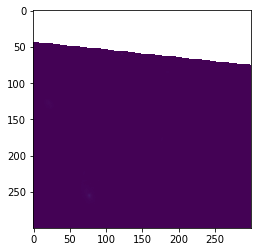

In [242]:
plt.figure()
plt.imshow(cutout.data)